In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
import seaborn as sns

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

## Simulation Based Approach
- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false
    - because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25.


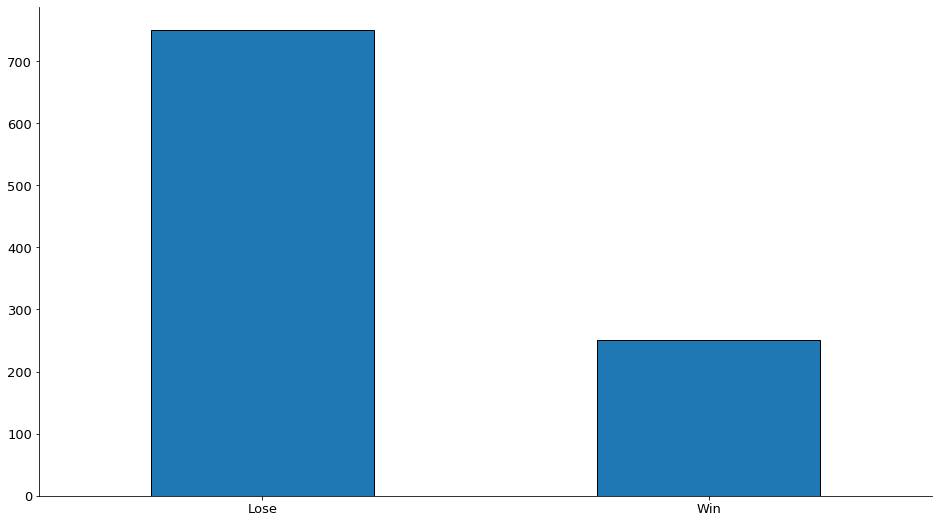

In [6]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation = 0)
print(f'The actual probability of winning is {tickets.mean()}.')

- Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory

    We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

    Examples of biased samples:

    - non-response: people that don't respond are a diff population
    - undercoverage: some groups aren't well represented
    - voluntary: people volunteer for surveys
    - leading questions
    - social desirability
- Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [7]:
n = 25
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.
- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [10]:
[tickets.sample(n).mean() for _ in range(5)]

[0.32, 0.2, 0.12, 0.16, 0.12]

- Theory

    The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

    If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

    That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

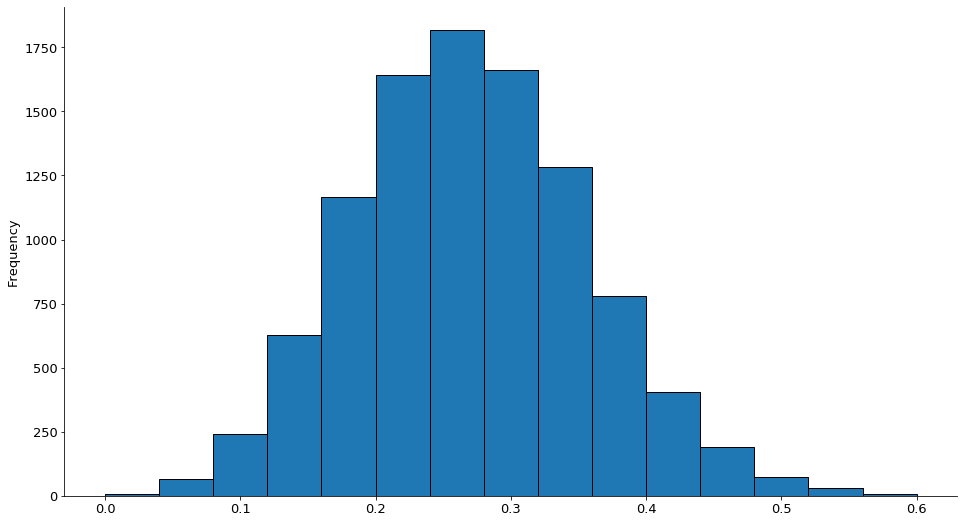

In [15]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins = 15)
plt.show()

- Theory

    The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

    The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

## Mini Exercise -- CLT
    1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
    2. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
    3. Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

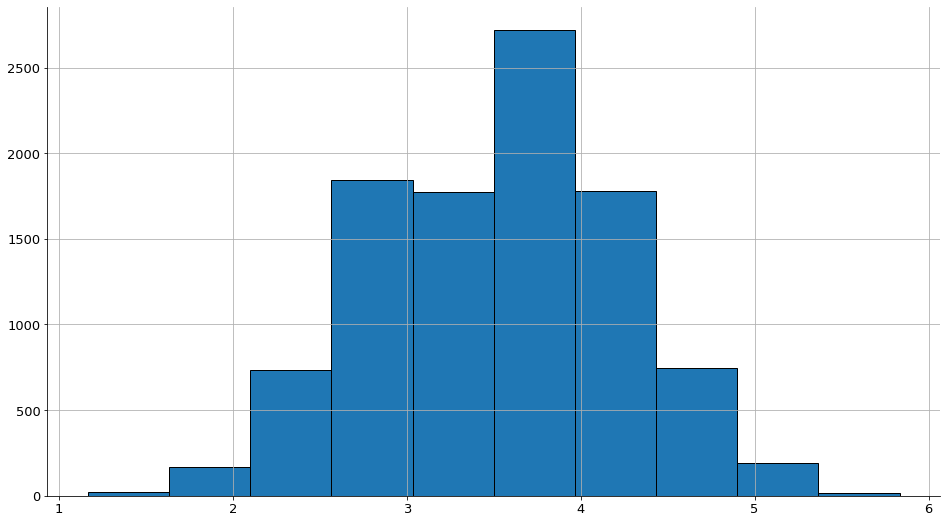

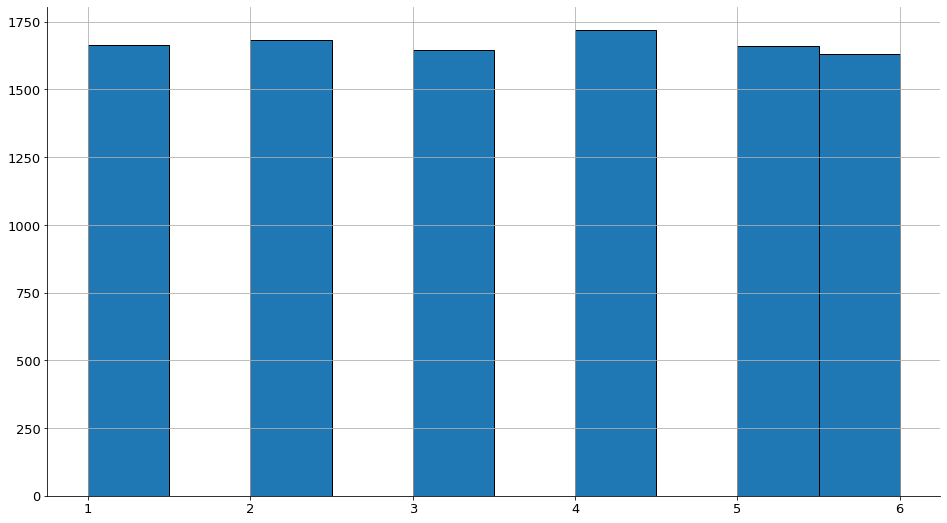

In [30]:
n_trials = nrows = 10_000
six_dice = ncols = 6
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
average_of_rolls = rolls.mean(axis = 1)
average_of_rolls = pd.Series(average_of_rolls)
average_of_rolls.hist()
plt.show()
#it is close to a standard normal distribution


n_trials = nrows = 10_000
one_dice = ncols = 1
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * one_dice).reshape(nrows, ncols)
average_of_rolls = rolls.mean(axis = 1)
average_of_rolls = pd.Series(average_of_rolls)
average_of_rolls.hist()
plt.show()
#it is close to a uniform distribution

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is $\sqrt{\frac{pq}{n}}$(for our example), aka the __standard error__

In [16]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [17]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0865


That the sampling distribution being normally distributed is very powerful and has important implications:

- confidence intervals for population parameter estimates (e.g. estimating the population mean)
    - as n goes up, interval becomes smaller
    - as certainty goes up, interval becomes larger
    - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
    - One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [31]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.2790833159242915

The probability we've calculated is __p-value__. The likelihood that we observe the data that we have if the null hypothesis is true.

## Null and Alternative Hypothesis
- $H_{0}$
: status quo: no difference or no effect
- $H_{a}$
: alternative: there is a difference or effect
- whether $H_{a}$
 is ≠
, <, >, determines __one-tailed__ vs __two-tailed test__
    - $<$ or $>$ == one-tailed
    - $≠$
 == two-tailed

### Mini Exercise -- Null + Alternate Hypothesis and Errors
For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

- Are the average grades in web development vs data science classes different?
- Is there a relationship between how early a student shows up to class and their grade?
- Are web dev or data science students more likely to be coffee drinkers?

- Are the average grades in the web development class significantly different than the average grades in the data science class?
    - $H_{0}$ :there is no difference in grades
    - $H_{a}$ : there is a difference in grades
    - TP : web dev and data science grades have no difference
    - Type II : we say there is a difference when in fact there is not
    - Type I : we say there is not a difference when in fact there is
    - TN : web dev and data science grades have a difference
    

- Is there a significant difference between how early a student shows up to class and their grade?
    - $H_{0}$ :there is no difference between grades and punctuation
    - $H_{a}$ : there is a difference between grades and punctuation
    - TP : grades and punctuation have no difference
    - Type II : we say there is a difference when in fact there is not
    - Type I : we say there is not a difference when in fact there is
    - TN : grades and punctuation have a difference

- Is there a significant difference between the probability of a web dev being a coffee drinker than the probability of a data science student being a coffee drinker?
    - $H_{0}$ :there is no difference between web dev and DS
    - $H_{a}$ : there is a difference between web dev and DS
    - TP : both are equally probable of being coffee drinkers
    - Type II : we say there is a difference when in fact there is not
    - Type I : we say there is not a difference when in fact there is
    - TN : both are not equally probable of being coffee drinkers

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
    - $H_{0}$ :there is no difference between network latency and internet provider
    - $H_{a}$ : there is a difference between network latency and internet provider
    - TP : there is a significant difference between network latency and the internet provider  
    - Type II : we say there is a difference when in fact there is not
    - Type I : we say there is not a difference when in fact there is
    - TN : there is not a significant difference between network latency and network provider 

- Is the website redesign any good?
- Since the website redesign, has their been an increase in traffic?
    - $H_{0}$ :there is no difference between website redesign and the amount of traffic
    - $H_{a}$ : there is a difference between website redesign and the amount of traffic
    - TP : there is an increase in the amount of traffic since the website redesign
    - Type II : we say there is an increase when in fact there is not
    - Type I : we say there has not been an increase when in fact there is
    - TN : there is not an increase in the amount of traffic since the website redesign

- Is our television ad driving more sales?
- Since we have debuted our television ad, has there been an increase in sales?
    - $H_{0}$ :there is no difference between the debute of our television ad and the amount of sales
    - $H_{a}$ : there is a difference between the debute of our television ad and the amount of sales
    - TP : there is an increase in sales since the television ad debuted
    - Type II : we say there is an increase when in fact there is not
    - Type I : we say there has not been an increase when in fact there is
    - TN : there is not an increase in sales since the television ad debuted

# T-Test Exercises
Load the mpg dataset and use it to answer the following questions:

## Exercise 2a
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [3]:
mpg = data('mpg')
mpg = mpg.assign(mpg_avg = (mpg.cty + mpg.hwy) / 2)
mpg1999 = mpg[mpg.year == 1999].mpg_avg
mpg2008 = mpg[mpg.year == 2008].mpg_avg

__A. Plot Distribution__

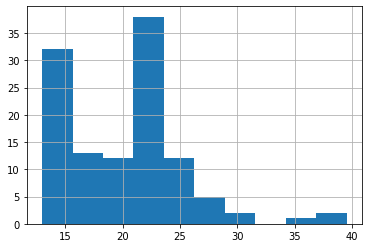

In [5]:
mpg1999.hist()
plt.show()

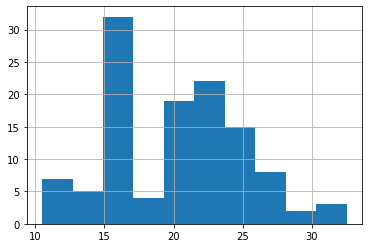

In [6]:
mpg2008.hist()
plt.show()

__B. Set Hypothesis__

$H_{0}$: mean mpg of cars from 1999 = mean mpg of cars from 2008

$H_{a}$: mean mpg of cars from 1999 != mean mpg of cars from 2008

__C. Set Alpha__

In [7]:
alpha = .05

__D. Verify Assumptions__

- normal distribution: YES
- large enough:  YES
- variance:  ??

In [8]:
mpg1999.var()

27.122605363984682

In [9]:
mpg2008.var()

24.097480106100797

__E. Compute Test Statistics__

In [43]:
t, p = stats.ttest_ind(mpg1999, mpg2008, equal_var = True)
t, p

(0.21960177245940962, 0.8263744040323578)

In [12]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We fail to reject the null


__Conclusion__: We fail to reject the null hypothesis. There is not a difference in fuel-efficiency in cars from 2008 vs 1999.

## Exercise 2b
- Are compact cars more fuel-efficient than the average car?

__A. Plot Distribution__

In [27]:
mpg['class'].value_counts()
compact_mpg = mpg[mpg['class'] == 'compact'].mpg_avg
avg_car_mpg = mpg[mpg['class'] == 'midsize'].mpg_avg

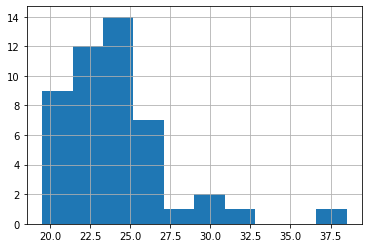

In [28]:
compact_mpg.hist()
plt.show()

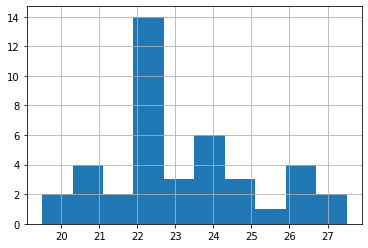

In [29]:
avg_car_mpg.hist()
plt.show()

__B. Set Hypothesis__

$H_{0}$: compact cars fuel-efficiency == midsize cars fuel-efficiency

$H_{a}$: compact cars fuel-efficiency != midsize cars fuel-efficiency

__C. Set Alpha__

In [30]:
alpha = .05

__D. Verify Assumptions__

- normal distribution: YES
- large enough:  YES, over 30
- variance:  ??

In [31]:
compact_mpg.var()

12.442876965772433

In [32]:
avg_car_mpg.var()

3.8118902439024374

__E. Compute Test Statistics__

In [34]:
t, p = stats.ttest_ind(compact_mpg, avg_car_mpg, equal_var = False)
t, p

(1.9869420198494934, 0.050653659390104896)

In [35]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We fail to reject the null


__Conclusion__: We fail to reject the null hypothesis. There is not a difference in fuel-efficiency in compact cars to midsize

## Exercise 2c

- Do manual cars get better gas mileage than automatic cars?

__A. Plot Distribution__

In [36]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [37]:
mpg['transmission'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
manual_mpg = mpg[mpg.transmission == 'manual'].mpg_avg
auto_mpg = mpg[mpg.transmission == 'auto'].mpg_avg

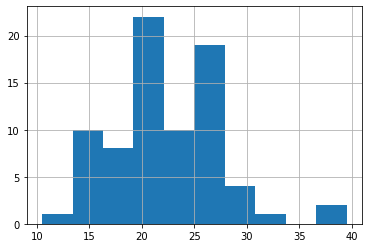

In [38]:
manual_mpg.hist()
plt.show()

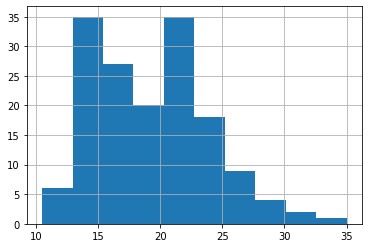

In [39]:
auto_mpg.hist()
plt.show()

__B. Set Hypothesis__

$H_{0}$: manual cars gas mileage == automatic cars gas mileage

$H_{a}$: manual cars gas mileage != automatic cars gas mileage

__C. Set Alpha__

__D. Verify Assumptions__

- normal distribution: YES
- large enough:  YES, over 30
- variance:  ??

In [40]:
manual_mpg.var()

26.635167464114826

In [41]:
auto_mpg.var()

21.942777233382337

__E. Compute Test Statistics__

In [44]:
t, p = stats.ttest_ind(manual_mpg, auto_mpg, equal_var = False)
t, p

(4.443514012903071, 1.795224899991793e-05)

In [45]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


__Conclusion__: We reject the null hypothesis. There is not a difference in fuel-efficiency in manual transmission cars to automatic trasmission cars

# Correlation Exercises

## Exercise 1
Use the telco_churn data. 

In [66]:
from env import host, username, password
url = (f'mysql+pymysql://{username}:{password}@{host}/telco_churn')
telco_churn = pd.read_sql('SELECT * FROM customers', url)
telco = pd.DataFrame(telco_churn)
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


- Does tenure correlate with monthly charges?

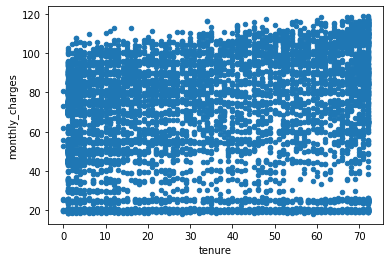

In [36]:
telco.plot.scatter(y = 'monthly_charges', x = 'tenure')
plt.show()

Abbreviated Hypothesis Testing Procedure:
1. Setup
2. Calculate test statistic + p-value
3. Conclude

    - $\alpha = .05$
    - $H_0$: There is no linear relationship between tenure and monthly charges
    - $H_a$: There is a linear relationship between tenure and monthly charges

In [45]:
x = telco.tenure
y = telco.monthly_charges
r, p = stats.pearsonr(x, y)
r, p

(0.24789985628615002, 4.0940449915016345e-99)

__Conclusion__: We reject the null hypothesis. There is a linear relationship between tenure and monthly charges but does not appear to have a strong correlation with each other

- Total charges?

In [68]:
#telco['total_charges'] = telco['total_charges'].astype(float)
telco.plot.scatter(y = 'total_charges', x = 'tenure')
plt.show()

KeyboardInterrupt: 

Abbreviated Hypothesis Testing Procedure:
1. Setup
2. Calculate test statistic + p-value
3. Conclude

    - $\alpha = .05$
    - $H_0$: There is no linear relationship between tenure and total charges
    - $H_a$: There is a linear relationship between tenure and total charges

- What happens if you control for phone and internet service?

In [63]:
x = telco.tenure
z = telco.total_charges
r, p = stats.pearsonr(x, z)
r, p

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

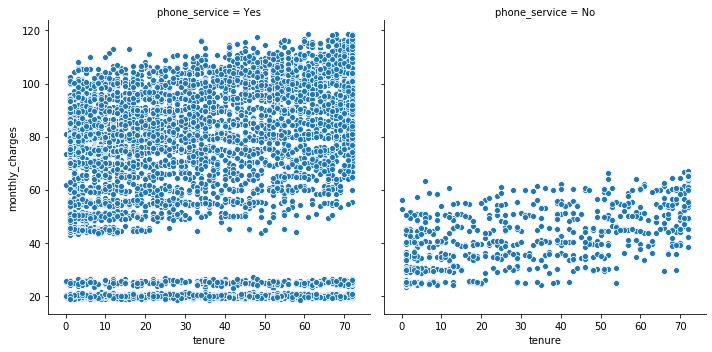

In [64]:
sns.relplot(data=telco, y='monthly_charges', x='tenure', col='phone_service')
plt.show()

Abbreviated Hypothesis Testing Procedure:
1. Setup
2. Calculate test statistic + p-value
3. Conclude

    - $\alpha = .05$
    - $H_0$: There is no linear relationship between tenure and monthly charges for customers without a phone
    - $H_a$: There is a linear relationship between tenure and monthly charges for customers without a phone

In [72]:
no_phone = telco[telco.phone_service == 'No']
r, p = stats.pearsonr(no_phone.monthly_charges, no_phone.tenure)
r, p

(0.5857597986661366, 4.603370347342836e-64)

__Conclusion__: We reject the null hypothesis. There seems to be a linear relationship and a positive correlation between tenure and monthly charges for customers who do not have a phone.

Abbreviated Hypothesis Testing Procedure:
1. Setup
2. Calculate test statistic + p-value
3. Conclude

    - $\alpha = .05$
    - $H_0$: There is no linear relationship between tenure and monthly charges for customers with a phone
    - $H_a$: There is a linear relationship between tenure and monthly charges for customers with a phone

In [71]:
yes_phone = telco[telco.phone_service == 'Yes']
r, p = stats.pearsonr(yes_phone.monthly_charges, yes_phone.tenure)
r, p

(0.24538898585362878, 7.117871077967264e-88)

__Conclusion__: We reject the null hypothesis. There seems to be a linear relationship and a small positive correlation between tenure and monthly charges for customers who do not have a phone.

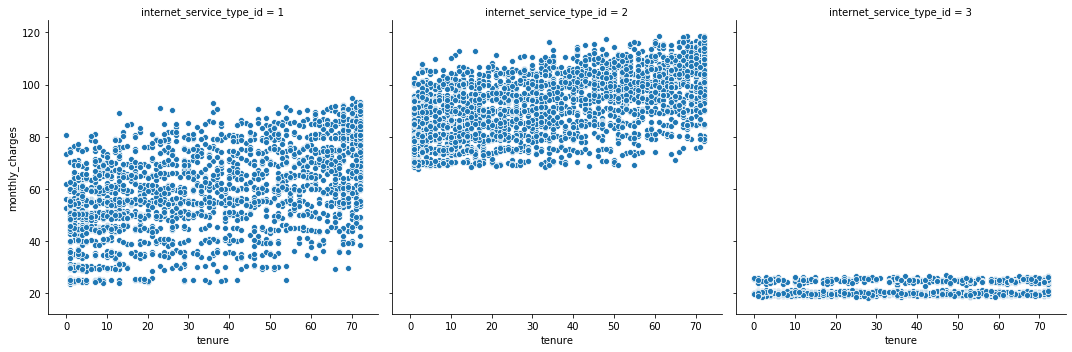

In [67]:
sns.relplot(data=telco, y='monthly_charges', x='tenure', col='internet_service_type_id')
plt.show()

# Chi Square Exercises
## Exercise 1
- Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


|  | Codeup Student | Not Codeup Student|
| --- | --- | --- |
| Uses a Macbook | 49 | 20 |
| Doesn't Use A Macbook | 1 | 30 |


In [76]:
index = ["Uses a Macbook", "Doesn't use a Macbook"]
columns = ["Codeup Student", "Not Codeup Student"]
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't use a Macbook,1,30


$H_0$: Attrition and Travel Frequency are independent (not dependent)

$H_a$: Attrition and Travel Frequency are dependent

In [75]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


1.4116760526193828e-09

## Exercise 2
- Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [80]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


$H_0$: cylinder and drive are independent (not dependent)

$H_a$: cylinder and drive are dependent

In [83]:
observed = pd.crosstab(mpg.cyl, mpg.drv)
observed

drv,4,f,r
cyl,,,
4,23,58,0
5,0,4,0
6,32,43,4
8,48,1,21


In [84]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")
p

We reject the null


6.143348809351039e-19

## Exercise 3
Use the data from the employees database to answer these questions:

In [87]:
from env import host, username, password
url = (f'mysql+pymysql://{username}:{password}@{host}/employees')
employees = pd.read_sql('SELECT * FROM employees', url)
emp = pd.DataFrame(employees)
dept_emp = pd.read_sql('SELECT * FROM dept_emp where to_date > curdate()', url)
dept = pd.DataFrame(dept_emp)
emp_dept = pd.merge(emp, dept, left_on = 'emp_no', right_on = 'emp_no')
dept_names = pd.read_sql('SELECT * FROM departments', url)
dept_names = pd.DataFrame(dept_names)
emp_dept_names = pd.merge(emp_dept, dept_names, left_on = 'dept_no', right_on = 'dept_no')
emp_dept_names

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,1990-08-05,9999-01-01,Development
2,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Development
3,10014,1956-02-12,Berni,Genin,M,1987-03-11,d005,1993-12-29,9999-01-01,Development
4,10022,1952-07-08,Shahaf,Famili,M,1995-08-22,d005,1999-09-03,9999-01-01,Development
...,...,...,...,...,...,...,...,...,...,...
240119,499771,1958-02-05,Hercules,Porotnikoff,M,1991-07-17,d002,1993-11-15,9999-01-01,Finance
240120,499868,1956-11-14,Shaz,Bierbaum,M,1988-11-01,d002,1996-10-03,9999-01-01,Finance
240121,499873,1960-12-10,Kasidit,Picel,F,1986-04-21,d002,1997-08-03,9999-01-01,Finance
240122,499977,1956-06-05,Martial,Weisert,F,1996-09-17,d002,1999-12-28,9999-01-01,Finance


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: gender and sales job is independent (not dependent)

$H_a$: gender and sales job is dependent

In [103]:
emp_dept_names["in_sales"] = emp_dept_names.dept_name == 'Sales'
observed = pd.crosstab(emp_dept_names.gender, emp_dept_names.in_sales)
observed

in_sales,False,True
gender,,
F,81011,14999
M,121412,22702


In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.39245449654187614

$H_0$: gender and marketing job is independent (not dependent)

$H_a$: gender and marketing job is dependent

In [105]:
emp_dept_names["in_marketing"] = emp_dept_names.dept_name == 'Marketing'
observed = pd.crosstab(emp_dept_names.gender, emp_dept_names.in_marketing)
observed

in_marketing,False,True
gender,,
F,90146,5864
M,135136,8978


In [106]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.2268904639583422

In [108]:
emp_dept_names

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,dept_name,in_sales,in_marketing
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01,Development,False,False
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,1990-08-05,9999-01-01,Development,False,False
2,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Development,False,False
3,10014,1956-02-12,Berni,Genin,M,1987-03-11,d005,1993-12-29,9999-01-01,Development,False,False
4,10022,1952-07-08,Shahaf,Famili,M,1995-08-22,d005,1999-09-03,9999-01-01,Development,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499771,1958-02-05,Hercules,Porotnikoff,M,1991-07-17,d002,1993-11-15,9999-01-01,Finance,False,False
240120,499868,1956-11-14,Shaz,Bierbaum,M,1988-11-01,d002,1996-10-03,9999-01-01,Finance,False,False
240121,499873,1960-12-10,Kasidit,Picel,F,1986-04-21,d002,1997-08-03,9999-01-01,Finance,False,False
240122,499977,1956-06-05,Martial,Weisert,F,1996-09-17,d002,1999-12-28,9999-01-01,Finance,False,False


- Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: gender and manager position is independent (not dependent)

$H_a$: gender and manager position is dependent

In [134]:
dept_managers = pd.read_sql('SELECT * FROM dept_manager', url)
dept_manager = pd.DataFrame(dept_manager)
dept_mang = pd.merge(emp, dept_manager, left_on = 'emp_no', right_on = 'emp_no')

if emp_dept_names['emp_no'].isin(dept_mang['emp_no']):
    emp_dept_names.manager == True
else:
    emp_dept_names.manager == False

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [122]:
observed = pd.crosstab(emp_dept_names.gender, emp_dept_names.manager)
observed

manager,False
gender,
F,96010
M,144114
